In [3]:
import pandas as pd
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the ZIP file path and extraction directory
zip_file_path = r'C:\\Users\\admin\\Downloads\\car+evaluation.zip'  # Update with your actual path
extract_dir = r'C:\\Users\\admin\\Downloads\\car_evaluation_extracted'  # Update this path if needed

# Create directory to extract ZIP file
os.makedirs(extract_dir, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files
extracted_files = os.listdir(extract_dir)
print("Extracted Files:", extracted_files)

# Load the dataset (assuming it’s a .csv file inside the ZIP)
data_file_path = os.path.join(extract_dir, 'car.data')  # Update if the file name is different
df = pd.read_csv(data_file_path, header=None)

# Assign column names to the dataset (Car Evaluation dataset column names)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Display the first few rows of the dataset
print(df.head())


Extracted Files: ['car.c45-names', 'car.data', 'car.names']
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode all the categorical features
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
print(df.head())


   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


In [7]:
# Features (X) and Target (y)
X = df.drop('class', axis=1)  # Features: all columns except 'class'
y = df['class']  # Target: 'class' column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the split data
print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (1382, 6)
Testing data size: (346, 6)


In [11]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the first few predictions
print("Predictions:", y_pred)


Predictions: [2 0 2 0 2 0 2 2 2 2 3 0 2 2 2 2 2 2 2 0 2 0 0 2 0 2 2 2 2 2 0 2 2 2 0 0 1
 2 2 2 2 2 0 0 1 0 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 0 2 2 0 3 2 0 0 2 2 2 2 2
 1 1 2 2 2 2 3 2 2 0 3 0 2 0 1 0 2 1 2 2 2 1 2 2 2 0 2 2 2 2 1 1 0 2 2 0 2
 2 2 2 2 0 1 2 2 2 2 0 2 0 0 2 1 2 2 2 2 2 0 2 2 0 2 3 2 2 2 0 0 0 2 0 2 2
 2 2 0 3 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 0 3 0 2 0 2 2 0 2 2 2 2 0 2 2 2 1
 0 2 2 0 2 2 2 0 2 2 2 2 0 2 2 2 2 2 1 2 2 2 1 2 2 2 2 0 2 2 0 2 2 2 1 3 2
 2 0 2 2 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 0 2 2 2 2 2 0 3 2 2 2 0 2 2 3 2 2 0 1 2 0 2 0 0 2 2 0 1 3 0 0 2 2 2 2 3
 0 0 2 2 2 2 3 2 2 2 2 0 2 2 3 0 0 2 2 0 0 0 2 0 0 2 2 2 2 2 2 0 2 2 2 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 2]


In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9682080924855492
Confusion Matrix:
[[ 76   6   1   0]
 [  1  10   0   0]
 [  0   0 235   0]
 [  1   2   0  14]]
Classification Report:
              precision    recall  f1-score   support

         acc       0.97      0.92      0.94        83
        good       0.56      0.91      0.69        11
       unacc       1.00      1.00      1.00       235
       vgood       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.98      0.97      0.97       346



In [15]:
import matplotlib.pyplot as plt

# Configure Matplotlib to display plots inline (if you're using Jupyter Notebook)
%matplotlib inline


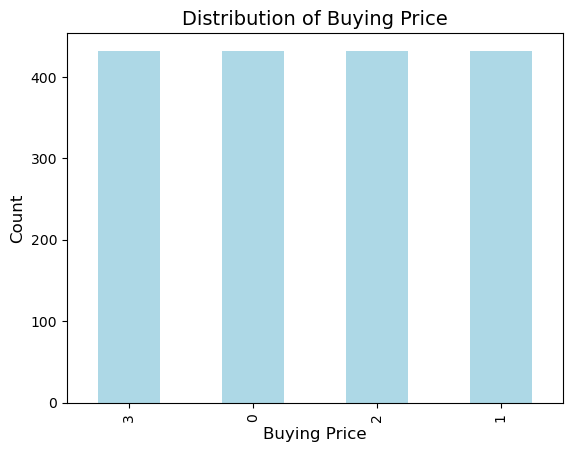

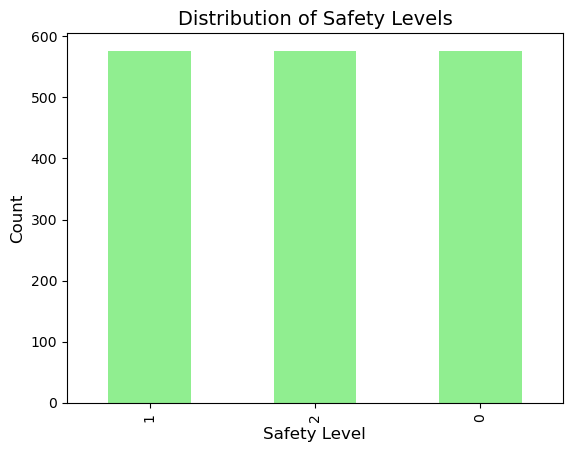

In [23]:
# Import Matplotlib
import matplotlib.pyplot as plt

# Bar plot for 'buying' feature
df['buying'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribution of Buying Price', fontsize=14)
plt.xlabel('Buying Price', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Bar plot for 'safety' feature
df['safety'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Safety Levels', fontsize=14)
plt.xlabel('Safety Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
